# Assignment 4: Flanker Individual Analysis
## Computational Methods in Psychology and Neuroscience
### Psychology 4215/7215 --- Fall 2023

# Objectives

Upon completion of this assignment, the student will have:

A. Participated in the Flanker task.

B. Performed a regression analysis to test for the Simon effect in your data.


# Assignment

* Write code in a Jupyter notebook (after making a copy and renaming it to have your userid in the title --- e.g., A05_Flanker_Individual_Analysis_mst3k).

## Details

The goal of this assignment is to perform the Flanker task, upload the data to Canvas, and perform a regression analysis of your data. *Note, the data and analysis will be uploaded as two separate assignments (4a and 4b) on Canvas.*

To run the Flanker task:

- Download the flanker.zip file
- Unzip it (usually with a command like, `unzip flanker.zip`
- Change to the `flanker` directory, `cd flanker`
- Activate the smile virtual environment: `conda activate smile`
- Then run the experiment with: `python flanker_exp.py -s mst3k`, replacing `mst3k` with your userid.
- Follow the instructions and try to perform well on all the blocks (it should take around 5 minutes.)

Once you have run in the flanker experiment, put a copy of this notebook in the flanker directory. Then open the notebook and perform the regression analysis described below.

The Flanker experiment will also create a zip file for you of your data from the session you ran. It will have a name with the following format `flanker_subj_session.zip`, where subj will be the userid you entered above, and session will be the date/time when you started the experiment. You will upload these data to one of the matching assignment.
  
* ***When you are done with the analysis, save this notebook as HTML (`File -> Download as -> HTML`) and upload it to the matching assignment on Canvas. There will be a separate assignment for uploading the Flanker data from when you ran the task.***  

In [1]:
# Load some required modules
# If you get an import error, make sure the libraries are installed:
# conda install -c conda-forge statsmodels

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
import matplotlib.pyplot as plt

from smile.log import log2dl

In [2]:
import os
os.getcwd()

'/Users/Samantha/Desktop/flanker'

In [3]:
# find and set the path to your log file (replace subj and sess with your info)
log_file = 'data/Flanker/sqr8ap/20231007_181440/log_flanker_0.slog'

# load it in
dl = log2dl(log_file)

# convert it to a Pandas DataFrame
df = pd.DataFrame(dl)

# show the first few lines
df.head()

,resp_map_left,resp_map_right,block_num,trial_num,stim_on_time,stim_on_error,resp,resp_time_time,resp_time_error,rt,correct,location_0,location_1,log_time,condition,direction,stimulus,log_num
0,F,J,0,0,296515.935094,0.0,J,296517.957115,0.009058,2.022020,True,1358.712331,919.482189,296518.475900,incongruent,right,<<<><<<,0
1,F,J,0,1,296518.501980,0.0,F,296519.405418,0.000152,0.903437,True,1418.016550,824.869985,296520.136166,congruent,left,<<<<<<<,0
2,F,J,0,2,296520.185418,0.0,J,296521.294703,0.000159,1.109286,True,2065.223386,928.691249,296521.932190,congruent,right,>>>>>>>,0
3,F,J,0,3,296521.968577,0.0,J,296522.578517,0.000166,0.609940,True,1436.434200,901.155763,296523.443489,congruent,right,>>>>>>>,0
4,F,J,0,4,296523.451954,0.0,F,296524.523546,0.008693,1.071592,True,1066.068219,1016.692042,296525.234445,mix,left,<>><>><,0


In [4]:
# load in the sysinfo slog
sinfo = log2dl('data/Flanker/sqr8ap/20231007_181440/sysinfo.slog')[0]
sinfo

{'fullscreen': None,
 'locked': 0,
 'density': '1.0',
 'font_size': 45.0,
 'font_name': 'Roboto',
 'frame_rate': 60.0,
 'default_data_dir': './data',
 'data_time': '20231007_181440',
 'debug': False,
 'resolution': None,
 'background_color': None,
 'scale_box_0': 1024,
 'scale_box_1': 768,
 'scale_up': True,
 'scale_down': True,
 'expname': 'Flanker',
 'processor': 'arm',
 'python_version': '3.11.4',
 'system': 'Darwin',
 'version': '',
 'author': '',
 'email': '',
 'date_last_update': '',
 'screen_size_0': 2880,
 'screen_size_1': 1800,
 'scale_factor': 1.171875,
 'log_num': 0}

In [5]:
# perform some quick data cleanup
# calculate the offset from the center
df['x_offset'] = df['location_0'] - sinfo['screen_size_0']/2

# save the log(rt)
df['log_rt'] = np.log(df['rt'])

# print out all the column names
print(df.columns)

Index(['resp_map_left', 'resp_map_right', 'block_num', 'trial_num',
       'stim_on_time', 'stim_on_error', 'resp', 'resp_time_time',
       'resp_time_error', 'rt', 'correct', 'location_0', 'location_1',
       'log_time', 'condition', 'direction', 'stimulus', 'log_num', 'x_offset',
       'log_rt'],
      dtype='object')


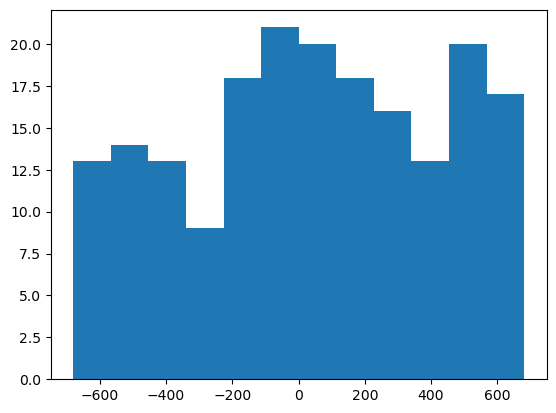

In [6]:
# plot the distribution of x_offset values (to see if it's skewed)
plt.hist(df['x_offset'], bins=12)
plt.show()

# BONUS: Use a non-parametric test to see whether they are skewed with respect to 0
# HINT: It's the sign rank test we talked about in class that was invented by Wilcoxon

In [8]:
# perform the regression

# YOUR CODE HERE TO DEFINE AND FIT THE MODEL

# you want to test if the log_rt is dependent on x_offset and direction (and their interaction)

# not sure if this next step is needed but just in case:
df.loc[df['direction'] == 'left', 'direction'] = 0
df.loc[df['direction'] == 'right', 'direction'] = 1


model = smf.ols("log_rt ~ x_offset*direction", df).fit()


# print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_rt   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7138
Date:                Thu, 12 Oct 2023   Prob (F-statistic):              0.545
Time:                        16:48:38   Log-Likelihood:                -95.895
No. Observations:                 192   AIC:                             199.8
Df Residuals:                     188   BIC:                             212.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.1103      0.042     -2.655      0.009      -0.192      -0.028
direction[T.1]             -0.0189      0.059     -0.322      0.748      -0.134       0.097
x_offset                   -0.0002      0.000     -1.444      0.150      -0.000    5.49e-05
x_offset:direction[T.1]     0.0001      0.000      0.859      0.391      -0.000       0.000
==============================================================================
Omnibus:                       33.967   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.935
Skew:                           1.001   Prob(JB):                     1.43e-11
Kurtosis:                       4.494   Cond. No.                         979.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# perform an ANOVA on the model to show whether the main effects and interaction are significant
import statsmodels.api as sm

sm.stats.anova_lm(model, typ=2) 

,sum_sq,df,F,PR(>F)
direction,0.008669,1.0,0.053394,0.817510
x_offset,0.222458,1.0,1.370123,0.243272
x_offset:direction,0.119773,1.0,0.737684,0.391498
Residual,30.524354,188.0,NaN,NaN


## Did you show a Simon effect? 

Look at the `PR(>F)` column for the `direction:x_offset` interaction row.

No; the interaction effect is insignificant, so I did not show a Simon effect. 